<a href="https://colab.research.google.com/github/LunaManuel7/hyperblog/blob/master/iFood_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

iFood Case

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys

In [ ]:
url = 'https://raw.githubusercontent.com/RodolfoMaya/ifood-data-business-analyst-test-latam/63bf6c72da5e144c15d2f4993be02dd3e3f8eb44/ml_project1_data.csv'
df = pd.read_csv(url)

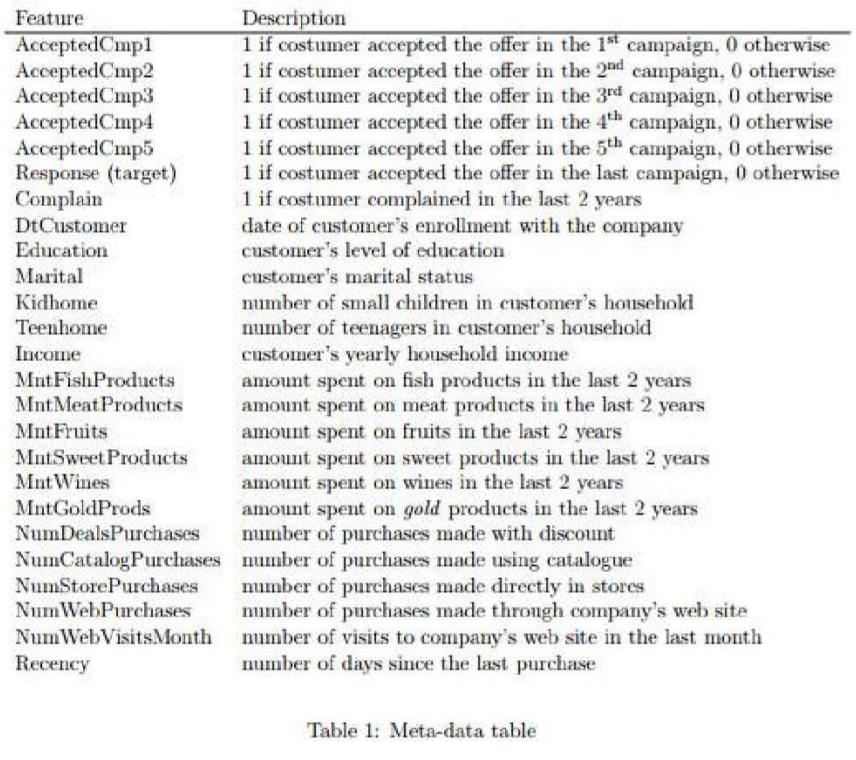

In [ ]:
from IPython.display import Image 
Image("/content/drive/MyDrive/IFood/Image.png")

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
NumVars = df.select_dtypes("int64").columns.to_list()

Feature Engineering

Cálculo de la Edad

In [ ]:
def Age(born):
  now= pd.to_datetime('today').year
  return now - born 
df['Age'] = df['Year_Birth'].apply(Age)
# Create a function that calculate Age from Year_Birth 

Año del ingreso Cliente


In [ ]:
from datetime import datetime, date
def YearCliente(date):
  Year = datetime.strptime(date, "%Y-%m-%d").date()
  return Year.year
df['TimeCustomer'] = df['Dt_Customer'].apply(YearCliente)
# Create a function that calculate Age from Year_Birth 

In [ ]:
#Total spendings on various items
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"]+ df["MntGoldProds"]

In [ ]:
#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [ ]:
#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [ ]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [ ]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [ ]:
df.isnull().sum()

Education               0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
TimeCustomer            0
Spent                   0
Living_With             0
Children                0
dtype: int64

In [ ]:
#To remove the NA values
df = df.dropna()

Se encuentra que hay 24 valores faltantes que corresponden a Income, lo que quiere decir que hay 24 personas que no reportaron sus ingresos. Es necesario identificar esto para el procesamiento de NA.

**Exploratory Data Analysis **

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
MntGoldProds,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


**VARIABLES CUANTITATIVAS**

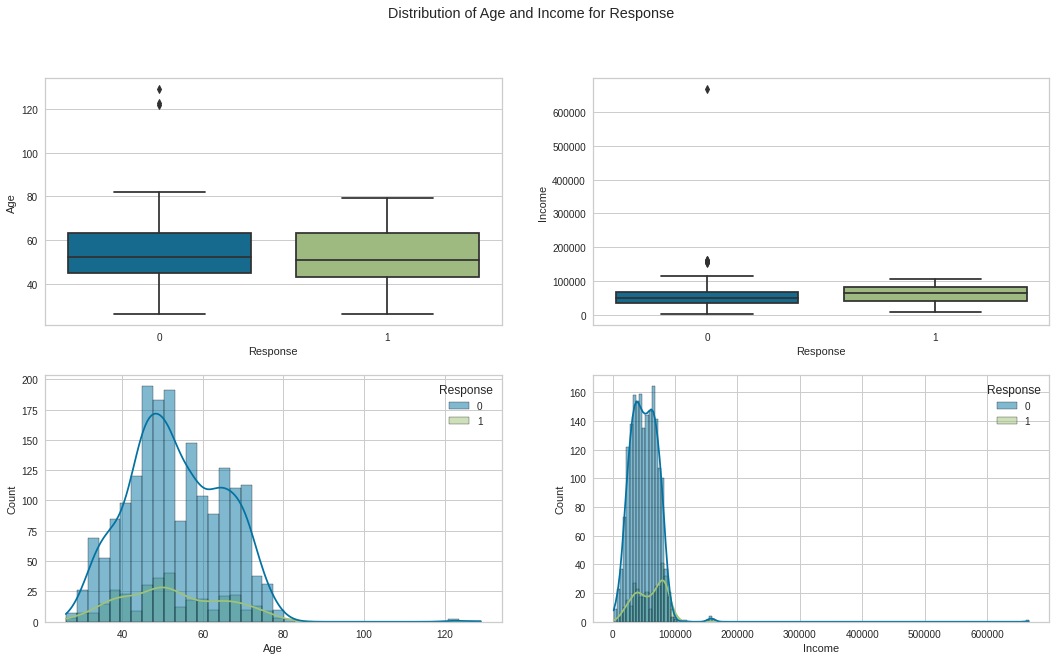

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (18,10))
fig.suptitle("Distribution of Age and Income for Response")

sns.boxplot(ax=axes[0,0], data= df, x="Response", y="Age")
sns.boxplot(ax=axes[0,1], data= df, x="Response", y="Income")
sns.histplot(ax=axes[1,0], data=df, x='Age', hue='Response', kde=True)
sns.histplot(ax=axes[1,1], data=df, x='Income', hue='Response', kde=True)


En la anterior figura de las variables cuantitativas se observa que hay dos personas cuya edad es mayor a 120 años, por lo tanto estos puntos son outliers e influyentes, lo que es conveniente, borrarlos o inputarlos, en este caso, por cuestión de desconocimiento del comporamiento de compra a profundidad, decidiré sacarlos del dataframe dado que esto afectaria las predicciones del modelo.

In [ ]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
BI_Calculado = (Q1-1.5*IQR)
BS_Calculado = (Q3+1.5*IQR)

In [ ]:
UbicacionOutliers = (df["Age"] < BI_Calculado) | (df["Age"] > BS_Calculado)
outliers = df[UbicacionOutliers]
outliers

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TimeCustomer,Spent,Living_With,Children
192,Undergraduate,36640.0,1,0,99,15,6,8,7,4,...,0,0,0,1,0,122,2013,65,Alone,1
239,Undergraduate,60182.0,0,1,23,8,0,5,7,0,...,0,0,0,0,0,129,2014,22,Alone,1
339,Postgraduate,83532.0,0,0,36,755,144,562,104,64,...,1,0,0,0,0,123,2013,1853,Partner,0


In [ ]:
SinOutliers = (df["Age"] >= BI_Calculado) & (df["Age"] <= BS_Calculado)
df = df[SinOutliers]

In [ ]:
df.groupby(['Response'])['Age','Income'].agg(['min','mean','std','max'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Age                            Income                              \
         min       mean        std max     min          mean           std   
Response                                                                     
0         26  53.185106  11.585202  82  1730.0  50824.326064  25258.652036   
1         26  52.504505  12.331667  79  7500.0  60209.675676  23194.080987   

                    
               max  
Response            
0         666666.0  
1         105471.0

Análogamente se realiza para la variable Income

In [ ]:
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1
BI_Calculado = (Q1-1.5*IQR)
BS_Calculado = (Q3+1.5*IQR)
UbicacionOutliers = (df["Income"] < BI_Calculado) | (df["Income"] > BS_Calculado)
outliers = df[UbicacionOutliers]
SinOutliers = (df["Income"] >= BI_Calculado) & (df["Income"] <= BS_Calculado)
df = df[SinOutliers]

**Amount Products **

In [ ]:
fig, axes = plt.subplots(2,5, figsize = (28,12))
fig.suptitle("Distribution of Type Amounts for Response")

sns.boxplot(ax=axes[0,0], data= df, x="Response", y="MntMeatProducts")
sns.boxplot(ax=axes[0,1], data= df, x="Response", y="MntFishProducts")
sns.boxplot(ax=axes[0,2], data= df, x="Response", y="MntSweetProducts")
sns.boxplot(ax=axes[0,3], data= df, x="Response", y="MntFruits")
sns.boxplot(ax=axes[0,4], data= df, x="Response", y="MntWines")
sns.histplot(ax=axes[1,0], data=df, x='MntMeatProducts', hue='Response', kde=True)
sns.histplot(ax=axes[1,1], data=df, x='MntFishProducts', hue='Response', kde=True)
sns.histplot(ax=axes[1,2], data=df, x='MntSweetProducts', hue='Response', kde=True)
sns.histplot(ax=axes[1,3], data=df, x='MntFruits', hue='Response', kde=True)
sns.histplot(ax=axes[1,4], data=df, x='MntWines', hue='Response', kde=True)

In [ ]:
df.groupby(['Response'])['MntMeatProducts','MntFishProducts','MntSweetProducts','MntFruits','MntWines'].agg(['min','mean','std','max'])

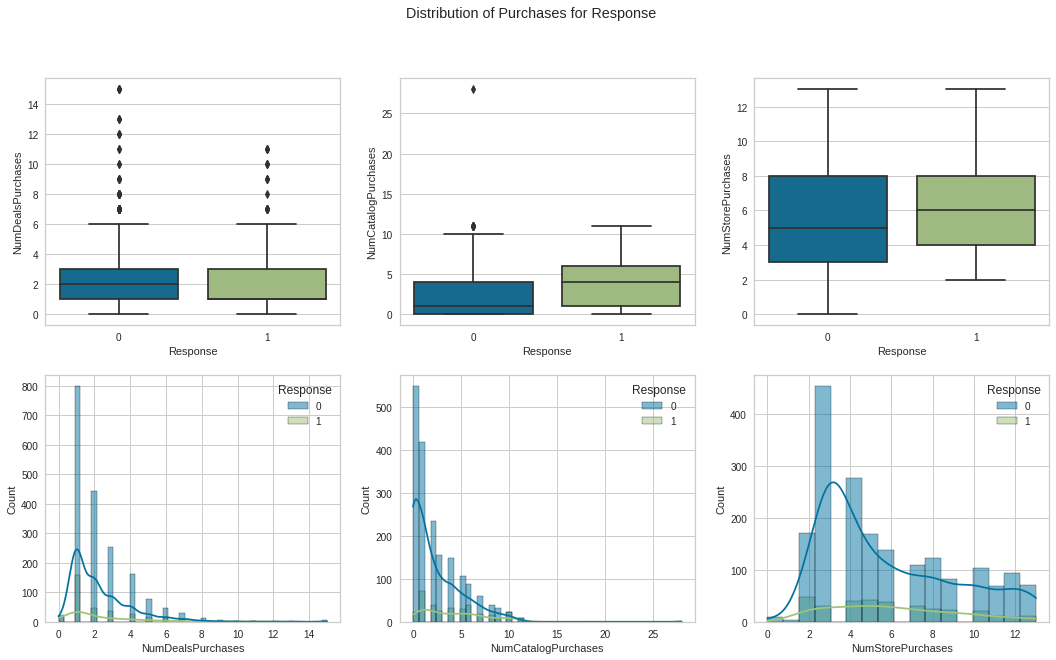

In [ ]:
fig, axes = plt.subplots(2,3, figsize = (18,10))
fig.suptitle("Distribution of Purchases for Response")

sns.boxplot(ax=axes[0,0], data= df, x="Response", y="NumDealsPurchases")
sns.boxplot(ax=axes[0,1], data= df, x="Response", y="NumCatalogPurchases")
sns.boxplot(ax=axes[0,2], data= df, x="Response", y="NumStorePurchases")
sns.histplot(ax=axes[1,0], data=df, x='NumDealsPurchases', hue='Response', kde=True)
sns.histplot(ax=axes[1,1], data=df, x='NumCatalogPurchases', hue='Response', kde=True)
sns.histplot(ax=axes[1,2], data=df, x='NumStorePurchases', hue='Response', kde=True)

In [ ]:
df.groupby(['Response'])['NumDealsPurchases','NumCatalogPurchases','NumStorePurchases'].agg(['min','mean','std','max'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


NumDealsPurchases                         NumCatalogPurchases  \
                       min      mean       std max                 min   
Response                                                                 
0                        0  2.314637  1.843659  15                   0   
1                        0  2.339339  2.111825  11                   0   

                                 NumStorePurchases                          
              mean       std max               min      mean       std max  
Response                                                                    
0         2.368590  2.640764  28                 0  5.777778  3.269276  13  
1         4.201201  3.136224  11                 2  6.081081  3.074776  13

Text(0.5, 1.0, 'Boxplot Recency and Response')

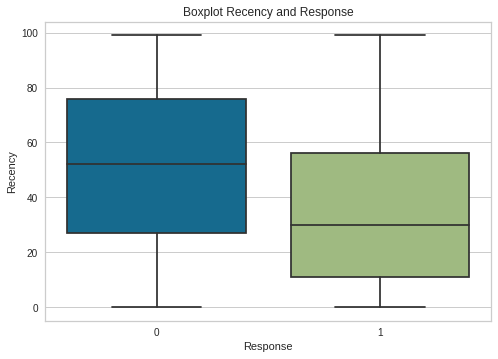

In [ ]:
sns.boxplot(data= df, x="Response", y="Recency").set_title('Boxplot Recency and Response')

In [ ]:
df.groupby(['Response'])['Recency'].agg(['min','mean','std','max'])

,min,mean,std,max
Response,,,,
0,0,51.454060,28.480192,99
1,0,35.264264,27.615407,99


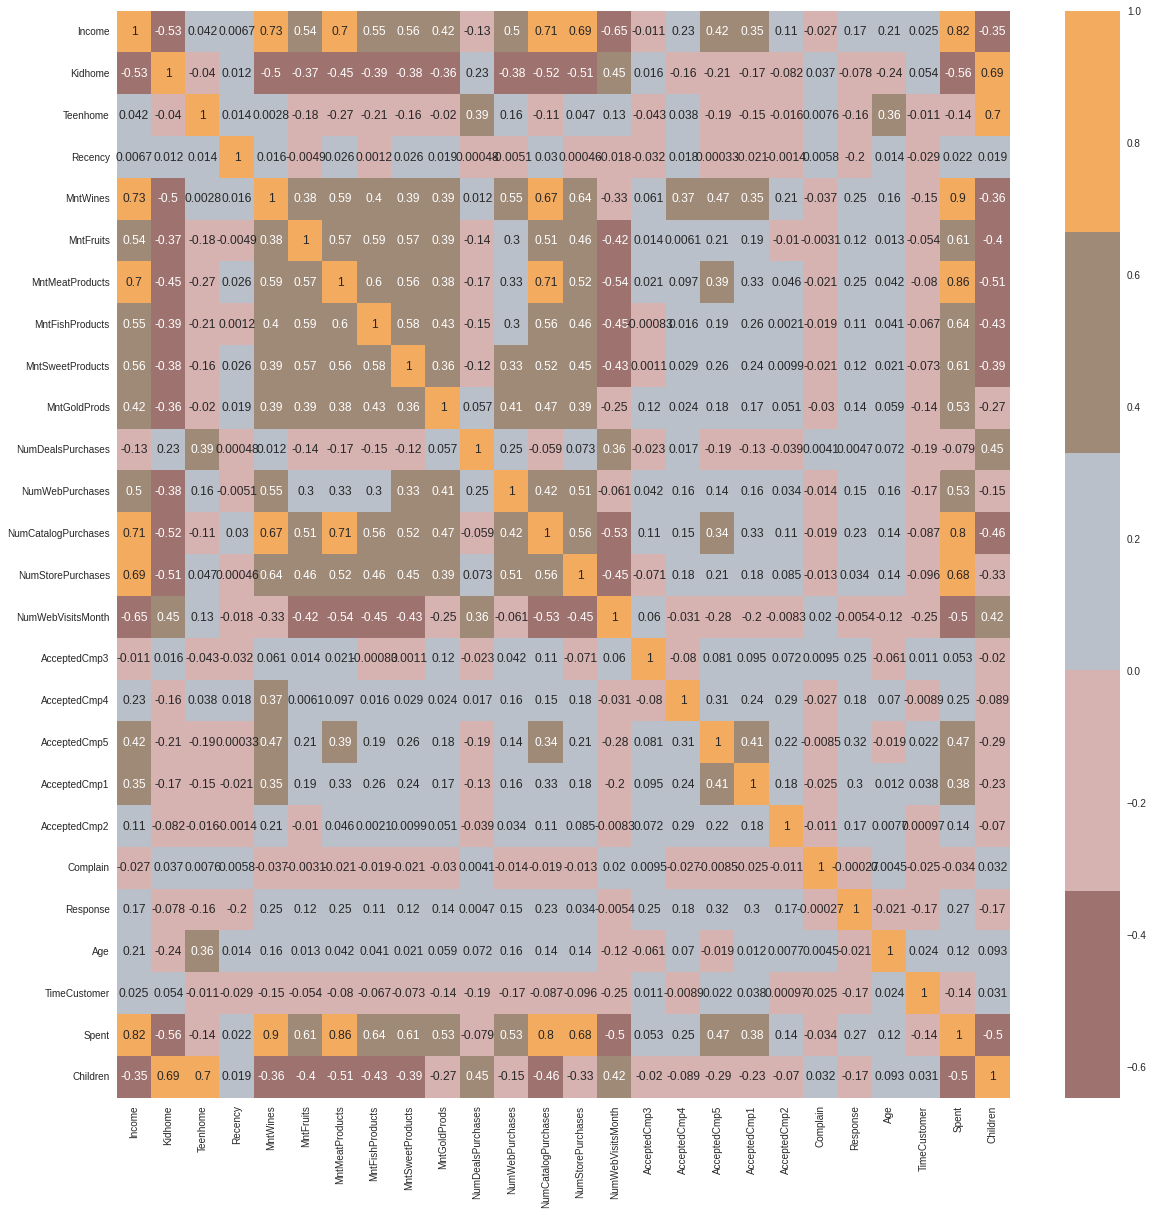

In [ ]:
#correlation matrix
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

VARIABLES CUALITATIVAS

In [ ]:
catVars = df.select_dtypes("object").columns.to_list()
catVars

['Education', 'Living_With']

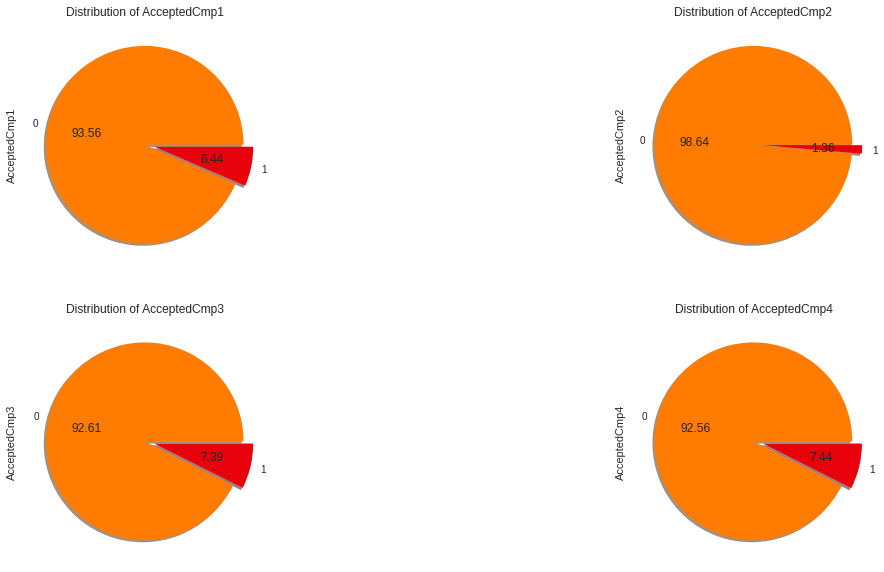

In [ ]:
f, ax  = plt.subplots(2,2,figsize = (20,10))
colors=["#FF7C00", "#E8000B","#1AC938"]
df['AcceptedCmp1'].value_counts().plot.pie(title='Distribution of AcceptedCmp1',explode=[0,.1],
                                           ax=ax[0][0],autopct="%.2f",shadow = True,colors = colors)

df['AcceptedCmp2'].value_counts().plot.pie(title='Distribution of AcceptedCmp2',explode=[0,.1],
                                                 ax=ax[0][1],autopct="%.2f",shadow = True,colors = colors)

df['AcceptedCmp3'].value_counts().plot.pie(title='Distribution of AcceptedCmp3',explode=[0,.1],
                                              ax=ax[1][0],autopct="%.2f",shadow = True,colors = colors)

df['AcceptedCmp4'].value_counts().plot.pie(title='Distribution of AcceptedCmp4',
                                                   ax=ax[1][1],explode=[0,.1],autopct="%.2f",shadow = True,colors=colors)
f.patch.set_facecolor('white')
plt.show()

In [ ]:
# Marital Status and Response
fig=px.histogram(df, 
                 x="Response",
                 color="Living_With",
                 hover_data=df.columns,
                 title="Distribution of Living_With for Response",
                 barmode="group")
fig.show()

In [ ]:
pd.crosstab(index=df['Living_With'], columns=df['Response'])

Response,0,1
Living_With,,
Alone,608,175
Partner,1264,158


In [ ]:
# Marital Status and Response
fig=px.histogram(df, 
                 x="Response",
                 color="Complain",
                 hover_data=df.columns,
                 title="Distribution of Complain for Response")
fig.show()

In [ ]:
pd.crosstab(index=df['Response'], columns=df['Complain'], normalize = "index")*100

Complain,0,1
Response,,
0,99.091880,0.908120
1,99.099099,0.900901


Cuantitativas y Cualitativas 

In [ ]:
fig = px.box(df,y="Age",x="Response",title="Distrubution of Complain for Age and Response",color="Complain")
fig.show()

In [ ]:
df.groupby(['Response', 'Complain'])['Age'].agg(['min','mean','std','max'])

min       mean        std  max
Response Complain                                
0        0          26  53.169272  11.567047   82
         1          34  56.647059  13.959500   79
1        0          26  52.648485  12.273879   79
         1          27  36.666667   9.073772   45

In [ ]:
fig = px.box(df, y="Income",x="Response",title="Distrubution of Complain for Income and Response",color="Complain")
fig.show()

In [ ]:
df.groupby(['Response', 'Complain'])['Income'].agg(['min','mean','std','max'])

min          mean           std       max
Response Complain                                               
0        0          1730.0  50147.797305  19866.117185  113734.0
         1         15716.0  44278.411765  18988.507274   80982.0
1        0          7500.0  60270.021212  23204.356225  105471.0
         1         37774.0  53571.666667  25725.984652   83257.0

In [ ]:
df.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
TimeCustomer             int64
Spent                    int64
Living_With             object
Children                 int64
dtype: object

DATA PREPROCESSING

In [ ]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [ ]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,TimeCustomer,Spent,Living_With,Children
0,-0.892338,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,...,0.361479,1.424772,2.628526,-0.562650,0.689203,1.017189,-1.498307,1.679323,-1.347625,-1.266589
1,-0.892338,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,...,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,1.273530,1.417639,-0.963897,-1.347625,1.403420
2,-0.892338,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,...,-0.699147,1.424772,-0.230646,1.288596,-0.554069,0.333612,-0.040334,0.281242,0.742046,-1.266589
3,-0.892338,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,...,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-1.289883,1.417639,-0.920675,0.742046,0.068415
4,0.571654,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,...,1.422105,0.328602,0.126750,0.054432,-0.139645,-1.033542,1.417639,-0.307248,0.742046,0.068415


DIMENSIONALITY REDUCTION

In [ ]:
np.random.seed(777888)
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2205.0,-1.933450e-17,2.768935,-5.674366,-2.537347,-0.740694,2.424861,7.401928
col2,2205.0,-1.288966e-17,1.529926,-3.165991,-1.286390,-0.194730,1.074376,5.629552
col3,2205.0,-6.444832e-18,1.200978,-3.412026,-0.818659,0.001846,0.818019,5.891737


CLUSTERING

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot

CLUSTERING

Elbow Method to determine the number of clusters to be formed:


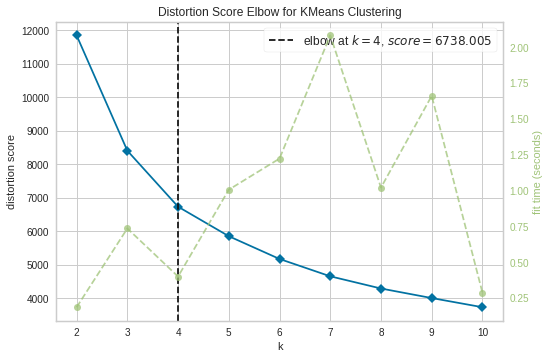

In [ ]:

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

Evaluating Models

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Firstly, let us have a look at the group distribution of clustring

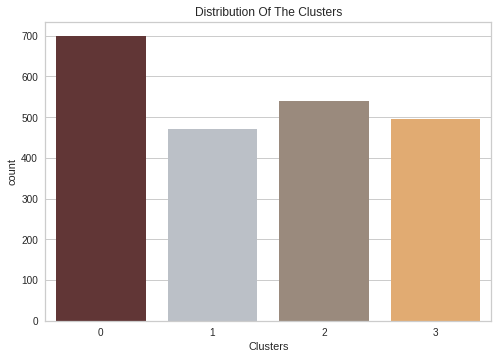

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
df.groupby(['Clusters'])['Clusters'].count()

Clusters
0    699
1    470
2    540
3    496
Name: Clusters, dtype: int64

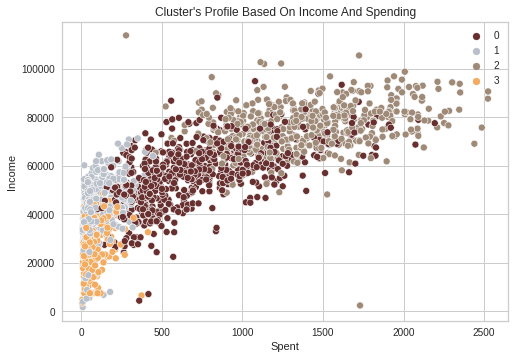

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

group 0: high spending & high income

group 1: low spending & high income

group 2: average spending & average income

group 3: low spending & low income

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

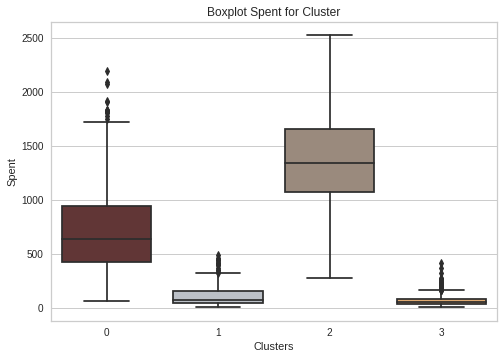

In [ ]:
plt.figure()
pl=sns.boxplot(x=df.Clusters , y=df.Spent, palette= pal).set_title("Boxplot Spent for Cluster")
plt.show()

In [ ]:
df.groupby(['Clusters'])['Spent'].agg(['min','mean','std','max'])

,min,mean,std,max
Clusters,,,,
0,65,720.991416,389.323831,2194
1,8,108.291489,95.226932,493
2,277,1385.755556,408.558863,2525
3,5,70.290323,55.313216,413


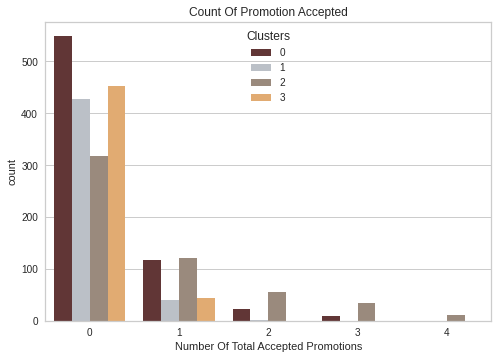

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

No ha habido una respuesta abrumadora a las campañas hasta ahora. Muy pocos participantes en general. Además, nadie toma parte en los 5 de ellos. Tal vez se requieran campañas mejor dirigidas y bien planificadas para impulsar las ventas.

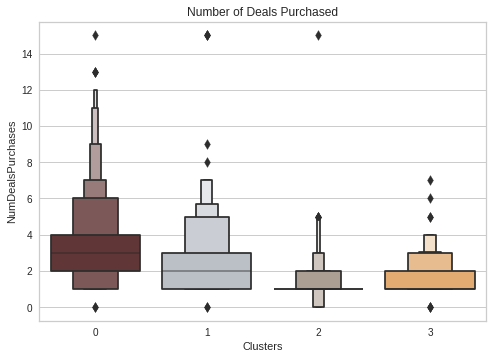

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

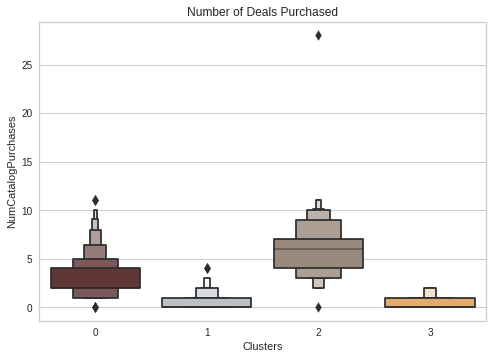

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumCatalogPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Text(0.5, 1.0, 'Number of Web Purchased')

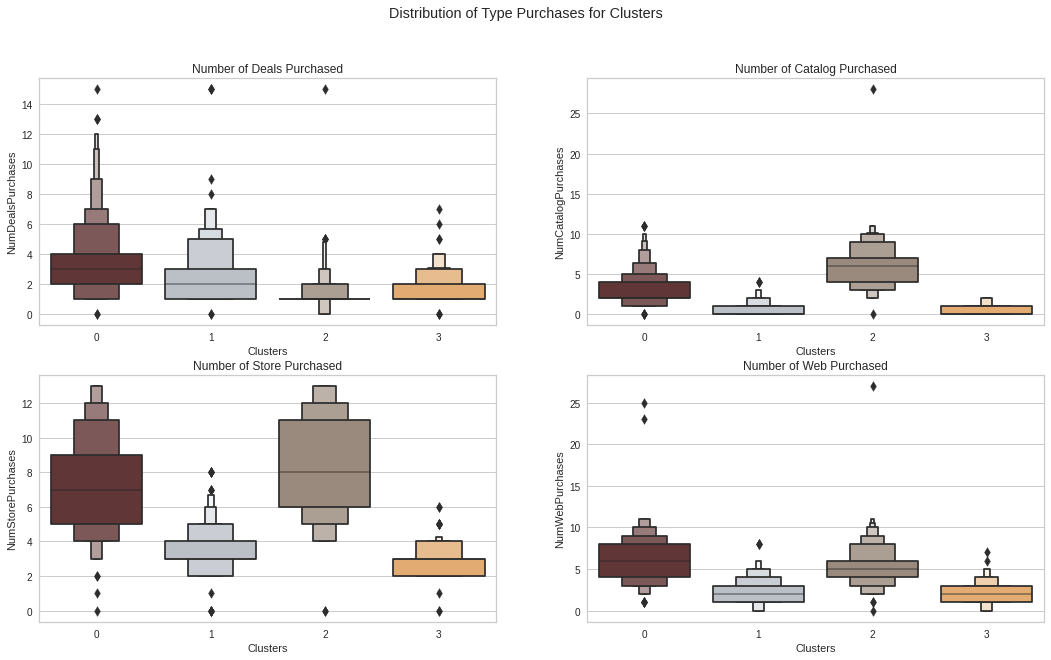

In [ ]:
# Distribution of Type Purchases for Clusters
fig, axes = plt.subplots(2,2, figsize = (18,10))
fig.suptitle("Distribution of Type Purchases for Clusters")

sns.boxenplot(ax=axes[0,0], y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal).set_title("Number of Deals Purchased")
sns.boxenplot(ax=axes[0,1], y=df["NumCatalogPurchases"],x=df["Clusters"], palette= pal).set_title("Number of Catalog Purchased")
sns.boxenplot(ax=axes[1,0], y=df["NumStorePurchases"],x=df["Clusters"], palette= pal).set_title("Number of Store Purchased")
sns.boxenplot(ax=axes[1,1], y=df["NumWebPurchases"],x=df["Clusters"], palette= pal).set_title("Number of Web Purchased")



In [ ]:
# Age for Cluster
df.groupby(['Clusters'])['Age'].agg(['min','mean','median','std','max'])

,min,mean,median,std,max
Clusters,,,,,
0,30,56.216023,56.0,10.481692,82
1,31,57.155319,56.5,8.808029,76
2,27,53.896296,53.0,13.584218,81
3,26,43.979839,44.0,8.208864,76


In [ ]:
# Age for Cluster
df.groupby(['Clusters'])['Spent'].agg(['min','mean','median','std','max'])

,min,mean,median,std,max
Clusters,,,,,
0,65,720.991416,636.0,389.323831,2194
1,8,108.291489,68.5,95.226932,493
2,277,1385.755556,1345.5,408.558863,2525
3,5,70.290323,55.0,55.313216,413


PROFILING

In [ ]:
df.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
TimeCustomer             int64
Spent                    int64
Living_With              int64
Children                 int64
Clusters                 int64
Total_Promos             int64
dtype: object

<Figure size 576x396 with 0 Axes>

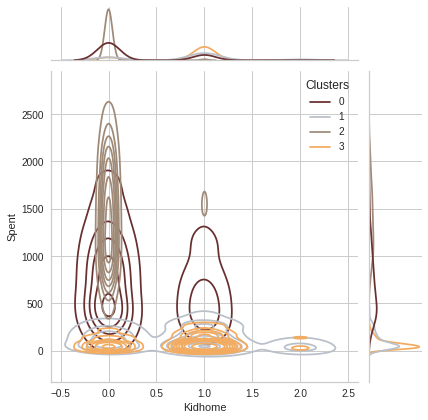

<Figure size 576x396 with 0 Axes>

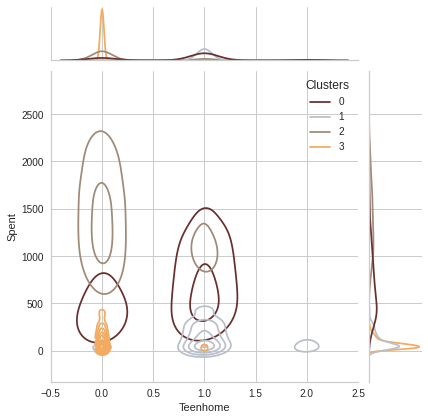

<Figure size 576x396 with 0 Axes>

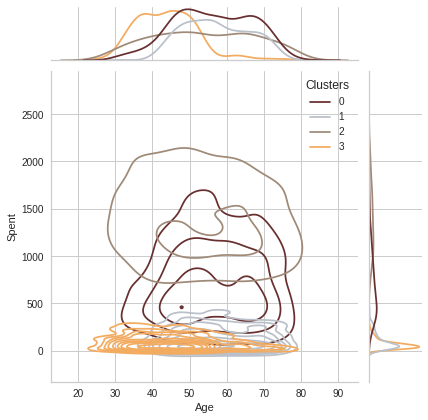

<Figure size 576x396 with 0 Axes>

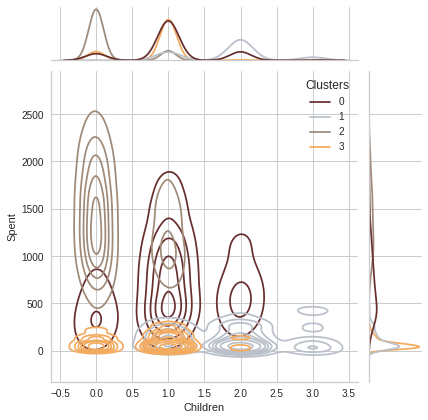

<Figure size 576x396 with 0 Axes>

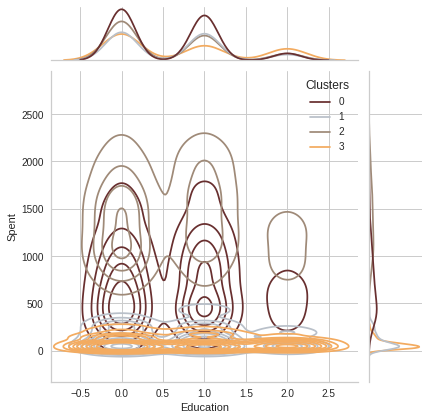

<Figure size 576x396 with 0 Axes>

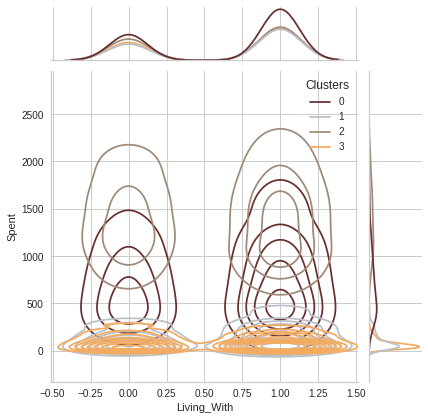

In [ ]:
Personal = [ "Kidhome","Teenhome", "Age", "Children", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

################## CLASSIFICATION MODELS ##################


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

# ---------------------------------------------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.metrics import average_precision_score

# ---------------------------------------------------------

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# ---------------------------------------------------------

# I changed this part
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier

import warnings


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.groupby("Response").mean()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Age,TimeCustomer,Spent,Living_With,Children,Clusters,Total_Promos
Response,,,,,,,,,,,,,,,,,,,,,
0,0.608440,50094.496261,0.459936,0.542201,51.454060,271.219017,24.350962,142.462073,35.273504,25.128205,...,0.033654,0.005342,0.009081,53.200855,2013.077457,539.432158,0.675214,1.002137,1.350427,0.176816
1,0.615616,60209.675676,0.342342,0.306306,35.264264,502.615616,37.939940,293.765766,51.714715,38.372372,...,0.237237,0.060060,0.009009,52.504505,2012.747748,985.660661,0.474474,0.648649,1.531532,0.987988


In [ ]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Age,TimeCustomer,Spent,Living_With,Children,Clusters,Total_Promos
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,65,2012,1617,0,0,2,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,68,2014,27,0,2,1,0
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,57,2013,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,38,2014,53,1,1,3,0
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,41,2014,422,1,1,0,0


Feature Selection by Random Forest

In [ ]:
df = df[['Response','Education','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
                     'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                     'AcceptedCmp1','AcceptedCmp2','Complain']]

In [ ]:
df.dtypes

Response                 int64
Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
dtype: object

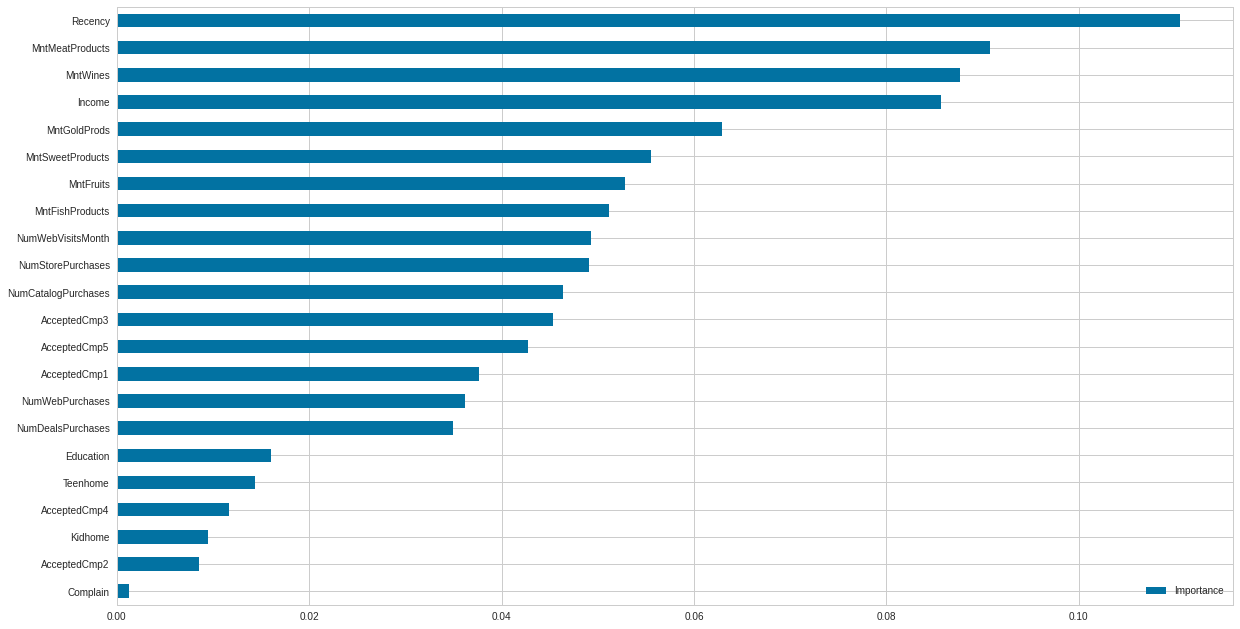

In [ ]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(df.drop('Response', axis=1), df['Response'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df.drop('Response', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));


Data Preparation for Classification Models

In [ ]:
X = df.drop(["Response"], axis=1)
Y = df["Response"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify = Y, random_state = 41)

print('Train: ', len(X_train))
print('Test: ',  len(X_test))

Train:  1764
Test:  441


In [ ]:
X_train_new = X_train[['Education','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
                       'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                       'AcceptedCmp1','AcceptedCmp2','Complain']]
X_test_new = X_test[['Education','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
                     'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                     'AcceptedCmp1','AcceptedCmp2','Complain']]

Logistic Regression (1)


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.287757
         Iterations 7
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.321     
Dependent Variable:  Response          AIC:               1059.2083 
Date:                2022-08-29 15:19  BIC:               1179.6658 
No. Observations:    1764              Log-Likelihood:    -507.60   
Df Model:            21                LL-Null:           -748.08   
Df Residuals:        1742              LLR p-value:       1.3955e-88
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Education           -0.0874   0.1185  -0.7378 0.4606 -0.3197  0.1448
Income              -0.0000 

Se extraen del modelo: Education, Kidhome, MntFruits, MntFishProducts

In [ ]:
cols=['Income','Teenhome','Recency','MntWines','MntMeatProducts','MntSweetProducts','MntGoldProds',
                     'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                     'AcceptedCmp1','AcceptedCmp2','Complain'] 
X=X_train[cols]
y=Y_train
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.289677
         Iterations 7
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.317     
Dependent Variable:  Response          AIC:               1057.9818 
Date:                2022-08-29 15:19  BIC:               1156.5379 
No. Observations:    1764              Log-Likelihood:    -510.99   
Df Model:            17                LL-Null:           -748.08   
Df Residuals:        1746              LLR p-value:       5.1383e-90
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Income              -0.0000   0.0000  -4.4288 0.0000 -0.0000 -0.0000
Teenhome            -0.9823 

Logistic Regression (2)

In [ ]:
LR = LogisticRegression(C=2, penalty='l1', random_state=0, solver='liblinear')
LR.fit(X_train_new, Y_train)

y_test_pred_LR = LR.predict(X_test_new)
y_train_pred_LR = LR.predict(X_train_new)

test_acc_LR = accuracy_score(Y_test, y_test_pred_LR)
train_acc_LR = accuracy_score(Y_train, y_train_pred_LR)
scores_LR = cross_val_score(LR, X_train_new , Y_train , cv = 10, scoring = 'accuracy' )

precision_score_LR = precision_score(Y_test, y_test_pred_LR)
recall_score_LR = recall_score(Y_test, y_test_pred_LR)
f1_score_LR = f1_score(Y_test, y_test_pred_LR)
conf_LR = confusion_matrix(Y_test, y_test_pred_LR)


print("Train set Accuracy: ", train_acc_LR)
print("Test set Accuracy: ", test_acc_LR)
print("cv:  %s\n"% scores_LR.mean())
print("************************************************")
print("precision_score: ", precision_score_LR)
print("recall_score: ", recall_score_LR)
print("f1_score: ", f1_score_LR)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(Y_test, y_test_pred_LR))

In [ ]:
log_odds = LR.coef_
odds = np.exp(log_odds)
print(odds)
odds.shape

In [ ]:
tt = pd.DataFrame(odds.T, index = [X_train_new.columns.T], columns = ["Odds"])
tt.sort_values(by=["Odds"], ascending=False)

Decision Tree Classifier

In [ ]:
DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0)
DT.fit(X_train_new, Y_train)

y_test_pred_DT = DT.predict(X_test_new)
y_train_pred_DT = DT.predict(X_train_new)

test_acc_DT = accuracy_score(Y_test, y_test_pred_DT)
train_acc_DT = accuracy_score(Y_train, y_train_pred_DT)
scores_DT = cross_val_score(DT, X_train_new , Y_train , cv = 10, scoring = 'accuracy' )

precision_score_DT = precision_score(Y_test, y_test_pred_DT)
recall_score_DT = recall_score(Y_test, y_test_pred_DT)
f1_score_DT = f1_score(Y_test, y_test_pred_DT)
conf_DT = confusion_matrix(Y_test, y_test_pred_DT)


print("Tain set Accuracy: ", train_acc_DT)
print("Test set Accuracy: ", test_acc_DT)
print("cv:  %s\n"% scores_DT.mean())
print("************************************************")
print("precision_score: ", precision_score_DT)
print("recall_score: ", recall_score_DT)
print("f1_score: ", f1_score_DT)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(Y_test, y_test_pred_DT))


Random Forest

In [ ]:
RF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_estimators=25,
                       random_state=0)

RF.fit(X_train_new, Y_train)

y_test_pred_RF = RF.predict(X_test_new)
y_train_pred_RF = RF.predict(X_train_new)

test_acc_RF = accuracy_score(Y_test, y_test_pred_RF)
train_acc_RF = accuracy_score(Y_train, y_train_pred_RF)
scores_RF= cross_val_score(RF, X_train_new , Y_train , cv = 10, scoring = 'accuracy' )

precision_score_RF = precision_score(Y_test, y_test_pred_RF)
recall_score_RF = recall_score(Y_test, y_test_pred_RF)
f1_score_RF = f1_score(Y_test, y_test_pred_RF)
conf_RF = confusion_matrix(Y_test, y_test_pred_RF)



print("Tain set Accuracy: ", train_acc_RF)
print("Test set Accuracy: ", test_acc_RF)
print("cv:  %s\n"% scores_RF.mean())
print("************************************************")
print("precision_score: ", precision_score_RF)
print("recall_score: ", recall_score_RF)
print("f1_score: ", f1_score_RF)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(Y_test, y_test_pred_RF))


KNeighbors Classifier

In [ ]:
k_range = list(range(2,25))
scores = []

for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train_new, Y_train)
    y_pred = KNN.predict(x_test_new)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)


plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')

plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')


**Model Comparison**

In [96]:
models = []
models.append(('DT', DT))
models.append(('RF', RF))
models.append(('KNN', KNN))
models.append(('LR', LR))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=100, shuffle=True)
    cv_results = cross_val_score(model, x_train_new, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    score = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(score)

NameError: ignored